In [88]:
import pandas as pd
import numpy as np
from time import sleep
from random import randint
from bs4 import BeautifulSoup
import requests
import re
import ast
from requests import get
from dateutil.parser import parse
from urllib.request import urlopen as uReq
import json
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from termcolor import colored
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

In [89]:
# getting the data

In [90]:
movies = pd.read_csv(r'D:\Proiect final\movies.csv')

In [91]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/12/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/3/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


<Axes: xlabel='runtime', ylabel='Count'>

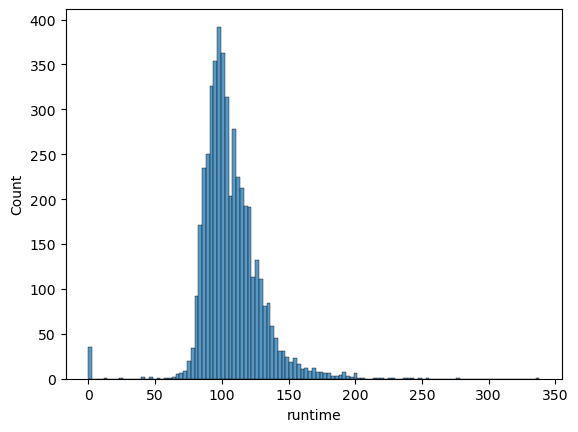

In [92]:
sns.histplot(data=movies, x=movies['runtime'])

In [93]:
movies.shape

(4803, 20)

In [94]:
credits = pd.read_csv(r'D:\Proiect final\credits.csv')

In [95]:
credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [96]:
credits.shape

(4803, 4)

In [97]:
# we can see there are colmns in JSON format

In [98]:
movies.shape

(4803, 20)

In [99]:
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'genres'] = str(list1)

In [100]:
movies['genres']

0       ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                      ['Adventure', 'Fantasy', 'Action']
2                        ['Action', 'Adventure', 'Crime']
3                ['Action', 'Crime', 'Drama', 'Thriller']
4              ['Action', 'Adventure', 'Science Fiction']
                              ...                        
4798                      ['Action', 'Crime', 'Thriller']
4799                                ['Comedy', 'Romance']
4800           ['Comedy', 'Drama', 'Romance', 'TV Movie']
4801                                                   []
4802                                      ['Documentary']
Name: genres, Length: 4803, dtype: object

In [101]:
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)

In [102]:
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

In [103]:
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [104]:
movies.iloc[10]

budget                                                          270000000
genres                  ['Adventure', 'Fantasy', 'Action', 'Science Fi...
homepage                                          http://www.superman.com
id                                                                   1452
keywords                ['saving the world', 'dc comics', 'invulnerabi...
original_language                                                      en
original_title                                           Superman Returns
overview                Superman returns to discover his 5-year absenc...
popularity                                                      57.925623
production_companies    [{"name": "DC Comics", "id": 429}, {"name": "L...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   28-06-2006
revenue                                                         391081192
runtime                               

In [105]:
credits.iloc[2]

movie_id                                               206647
title                                                 Spectre
cast        ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...
director                                           Sam Mendes
Name: 2, dtype: object

In [106]:
data_clust = pd.merge(left = movies, right = credits ,how = 'left', left_on = "id", right_on= "movie_id")
data_clust.shape

(4803, 24)

In [107]:
data_clust.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director'],
      dtype='object')

In [108]:
data_clust.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
director                  30
dtype: int64

<Axes: xlabel='vote_average', ylabel='Count'>

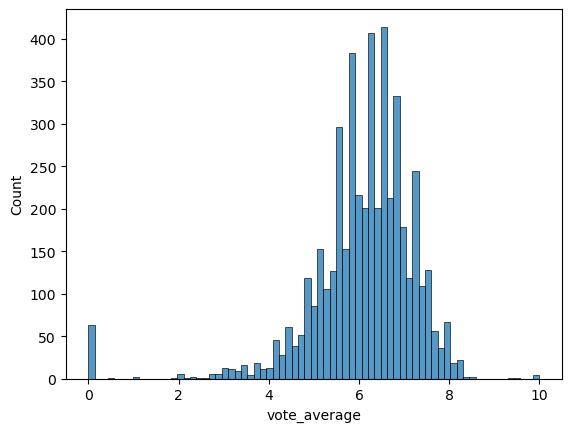

In [109]:
sns.histplot(data=data_clust, x=data_clust['vote_average'])

In [110]:
data_clust = data_clust.drop_duplicates()

In [111]:
data_clust.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,director
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton
5,258000000,"['Fantasy', 'Action', 'Adventure']",http://www.sonypictures.com/movies/spider-man3/,559,"['dual identity', 'amnesia', 'sandstorm', ""lov...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,559,Spider-Man 3,"['Tobey Maguire', 'Kirsten Dunst', 'James Fran...",Sam Raimi
6,260000000,"['Animation', 'Family']",http://disney.go.com/disneypictures/tangled/,38757,"['hostage', 'magic', 'horse', 'fairy tale', 'm...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330,38757,Tangled,"['Zachary Levi', 'Mandy Moore', 'Donna Murphy'...",Byron Howard
7,280000000,"['Action', 'Adventure', 'Science Fiction']",http://marvel.com/movies/movie/193/avengers_ag...,99861,"['marvel comic', 'sequel', 'superhero', 'based...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {"

In [112]:
# we are going to drop some features

In [113]:
data_clust = data_clust[['id', 'release_date','original_title', 'title_x', 'original_language', 'genres', 'keywords', 'cast', 'vote_average', 'director', 'overview']]
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview
0,19995,10/12/2009,Avatar,Avatar,en,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['culture clash', 'future', 'space war', 'spac...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drug abuse', 'exotic island', 'east...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,26-10-2015,Spectre,Spectre,en,"['Action', 'Adventure', 'Crime']","['spy', 'based on novel', 'secret agent', 'seq...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['Action', 'Crime', 'Drama', 'Thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,Following the death of District Attorney Harve...
4,49529,7/3/2012,John Carter,John Carter,en,"['Action', 'Adventure', 'Science Fiction']","['based on novel', 'mars', 'medallion', 'space...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [114]:
data_clust.isna().sum()

id                    0
release_date          1
original_title        0
title_x               0
original_language     0
genres                0
keywords              0
cast                  0
vote_average          0
director             30
overview              3
dtype: int64

In [115]:
data_clust = data_clust.dropna()

In [116]:
data_clust.shape

(4770, 11)

In [117]:
data_clust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4770 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4770 non-null   int64  
 1   release_date       4770 non-null   object 
 2   original_title     4770 non-null   object 
 3   title_x            4770 non-null   object 
 4   original_language  4770 non-null   object 
 5   genres             4770 non-null   object 
 6   keywords           4770 non-null   object 
 7   cast               4770 non-null   object 
 8   vote_average       4770 non-null   float64
 9   director           4770 non-null   object 
 10  overview           4770 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 447.2+ KB


In [118]:
data_clust['genres'] = data_clust['genres'].str.strip('[]').str.replace(' ','').str.lower()
data_clust['genres']


0       'action','adventure','fantasy','sciencefiction'
1                        'adventure','fantasy','action'
2                          'action','adventure','crime'
3                   'action','crime','drama','thriller'
4                 'action','adventure','sciencefiction'
                             ...                       
4798                        'action','crime','thriller'
4799                                 'comedy','romance'
4800               'comedy','drama','romance','tvmovie'
4801                                                   
4802                                      'documentary'
Name: genres, Length: 4770, dtype: object

In [119]:
data_clust['genres'] = data_clust['genres'].str.split(',')
data_clust['genres']

0       ['action', 'adventure', 'fantasy', 'sciencefic...
1                      ['adventure', 'fantasy', 'action']
2                        ['action', 'adventure', 'crime']
3                ['action', 'crime', 'drama', 'thriller']
4               ['action', 'adventure', 'sciencefiction']
                              ...                        
4798                      ['action', 'crime', 'thriller']
4799                                ['comedy', 'romance']
4800            ['comedy', 'drama', 'romance', 'tvmovie']
4801                                                   []
4802                                      ['documentary']
Name: genres, Length: 4770, dtype: object

In [120]:
genre_list = []
for index, row in data_clust.iterrows():
    genres = row["genres"]
    for val in genres:
        if val not in genre_list:
            genre_list.append(val)

In [121]:
genre_list

["'action'",
 "'adventure'",
 "'fantasy'",
 "'sciencefiction'",
 "'crime'",
 "'drama'",
 "'thriller'",
 "'animation'",
 "'family'",
 "'western'",
 "'comedy'",
 "'romance'",
 "'horror'",
 "'mystery'",
 "'history'",
 "'war'",
 "'music'",
 "'documentary'",
 "'foreign'",
 "'tvmovie'",
 '']

In [122]:
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,Following the death of District Attorney Harve...
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [123]:
data_clust['overview'][1]

'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.'

In [124]:
# cast

In [125]:
data_clust.shape

(4770, 11)

In [126]:
data_clust['cast']

0       ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...
1       ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...
2       ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...
3       ['Christian Bale', 'Michael Caine', 'Gary Oldm...
4       ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...
                              ...                        
4798    ['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...
4799    ['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...
4800    ['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...
4801    ['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...
4802    ['Drew Barrymore', 'Brian Herzlinger', 'Corey ...
Name: cast, Length: 4770, dtype: object

In [127]:
# i think we have all the actors from the movie, we don't need that

In [128]:
for actor,ind in zip(data_clust['cast'],data_clust.index):
    lista = []
    lista = actor[:60]
    data_clust.loc[ind,'cast'] = str(lista)   

In [129]:
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,Christopher Nolan,Following the death of District Attorney Harve...
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [130]:
data_clust['cast'] = data_clust['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.lower()
data_clust['cast'] = data_clust['cast'].str.split(',')

In [131]:
data_clust['cast'][0]

['samworthington', 'zoesaldana', 'sigourneyweaver', 'step']

In [132]:
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","[christianbale, michaelcaine, garyoldman, anne...",7.6,Christopher Nolan,Following the death of District Attorney Harve...
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [133]:
data_clust['director_rec'] = data_clust.loc[:, 'director']
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,James Cameron,"In the 22nd century, a paraplegic Marine is di...",James Cameron
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",Gore Verbinski
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,Sam Mendes,A cryptic message from Bond’s past sends him o...,Sam Mendes
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","[christianbale, michaelcaine, garyoldman, anne...",7.6,Christopher Nolan,Following the death of District Attorney Harve...,Christopher Nolan
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,Andrew Stanton,"John Carter is a war-weary, former military ca...",Andrew Stanton


In [134]:
# getting the list of directors

In [135]:
directorList=[]
for i in data_clust['director']:
    if i not in directorList:
        directorList.append(i)

In [136]:
directorList

['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Christopher Nolan',
 'Andrew Stanton',
 'Sam Raimi',
 'Byron Howard',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder',
 'Bryan Singer',
 'Marc Forster',
 'Andrew Adamson',
 'Rob Marshall',
 'Barry Sonnenfeld',
 'Peter Jackson',
 'Marc Webb',
 'Ridley Scott',
 'Chris Weitz',
 'Anthony Russo',
 'Peter Berg',
 'Colin Trevorrow',
 'Shane Black',
 'Tim Burton',
 'Brett Ratner',
 'Dan Scanlon',
 'Michael Bay',
 'Joseph Kosinski',
 'John Lasseter',
 'Martin Campbell',
 'Lee Unkrich',
 'McG',
 'James Wan',
 'J.J. Abrams',
 'Baz Luhrmann',
 'Mike Newell',
 'Guillermo del Toro',
 'Steven Spielberg',
 'Peter Sohn',
 'Brenda Chapman',
 'Justin Lin',
 'Roland Emmerich',
 'Robert Zemeckis',
 'Lilly Wachowski',
 'Pete Docter',
 'Conrad Vernon',
 'Jon Favreau',
 'Martin Scorsese',
 'Rob Cohen',
 'David Ayer',
 'Tom Shadyac',
 'Doug Liman',
 'Kevin Reynolds',
 'Stephen Sommers',
 'Rupert Sanders',
 'Robert Stromberg',
 'Matt Reeves',
 'Roland Joffé',

In [137]:
data_clust['director'] = data_clust['director'].str.replace(' ','').str.lower()

In [138]:
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,jamescameron,"In the 22nd century, a paraplegic Marine is di...",James Cameron
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,goreverbinski,"Captain Barbossa, long believed to be dead, ha...",Gore Verbinski
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,sammendes,A cryptic message from Bond’s past sends him o...,Sam Mendes
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","[christianbale, michaelcaine, garyoldman, anne...",7.6,christophernolan,Following the death of District Attorney Harve...,Christopher Nolan
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,andrewstanton,"John Carter is a war-weary, former military ca...",Andrew Stanton


In [139]:
# working with overview and keywords column

In [140]:
data_clust['overview'] = data_clust['overview'].apply(lambda x:x.split())
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","['culture clash', 'future', 'space war', 'spac...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,jamescameron,"[In, the, 22nd, century,, a, paraplegic, Marin...",James Cameron
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","['ocean', 'drug abuse', 'exotic island', 'east...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,goreverbinski,"[Captain, Barbossa,, long, believed, to, be, d...",Gore Verbinski
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","['spy', 'based on novel', 'secret agent', 'seq...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,sammendes,"[A, cryptic, message, from, Bond’s, past, send...",Sam Mendes
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","['dc comics', 'crime fighter', 'terrorist', 's...","[christianbale, michaelcaine, garyoldman, anne...",7.6,christophernolan,"[Following, the, death, of, District, Attorney...",Christopher Nolan
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","['based on novel', 'mars', 'medallion', 'space...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,andrewstanton,"[John, Carter, is, a, war-weary,, former, mili...",Andrew Stanton


In [141]:
data_clust['keywords'] = data_clust['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
data_clust['keywords']


0       cultureclash,future,spacewar,spacecolony,socie...
1       ocean,drugabuse,exoticisland,eastindiatradingc...
2       spy,basedonnovel,secretagent,sequel,mi6,britis...
3       dccomics,crimefighter,terrorist,secretidentity...
4       basedonnovel,mars,medallion,spacetravel,prince...
                              ...                        
4798    unitedstates–mexicobarrier,legs,arms,paperknif...
4799                                                     
4800    date,loveatfirstsight,narration,investigation,...
4801                                                     
4802                  obsession,camcorder,crush,dreamgirl
Name: keywords, Length: 4770, dtype: object

In [142]:
data_clust['keywords'] = data_clust['keywords'].str.split(',')
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,jamescameron,"[In, the, 22nd, century,, a, paraplegic, Marin...",James Cameron
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","[ocean, drugabuse, exoticisland, eastindiatrad...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,goreverbinski,"[Captain, Barbossa,, long, believed, to, be, d...",Gore Verbinski
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","[spy, basedonnovel, secretagent, sequel, mi6, ...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,sammendes,"[A, cryptic, message, from, Bond’s, past, send...",Sam Mendes
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","[dccomics, crimefighter, terrorist, secretiden...","[christianbale, michaelcaine, garyoldman, anne...",7.6,christophernolan,"[Following, the, death, of, District, Attorney...",Christopher Nolan
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","[basedonnovel, mars, medallion, spacetravel, p...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,andrewstanton,"[John, Carter, is, a, war-weary,, former, mili...",Andrew Stanton


In [143]:
data_clust['director']= data_clust['director'].apply(lambda x: [x])
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,[jamescameron],"[In, the, 22nd, century,, a, paraplegic, Marin...",James Cameron
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","[ocean, drugabuse, exoticisland, eastindiatrad...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,[goreverbinski],"[Captain, Barbossa,, long, believed, to, be, d...",Gore Verbinski
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","[spy, basedonnovel, secretagent, sequel, mi6, ...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,[sammendes],"[A, cryptic, message, from, Bond’s, past, send...",Sam Mendes
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","[dccomics, crimefighter, terrorist, secretiden...","[christianbale, michaelcaine, garyoldman, anne...",7.6,[christophernolan],"[Following, the, death, of, District, Attorney...",Christopher Nolan
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","[basedonnovel, mars, medallion, spacetravel, p...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,[andrewstanton],"[John, Carter, is, a, war-weary,, former, mili...",Andrew Stanton


In [144]:
# creating a new column for text analyse

In [145]:
data_clust['words'] = data_clust['keywords']+data_clust['overview']+data_clust['genres']+data_clust['cast']+data_clust['director']
data_clust.head()

,id,release_date,original_title,title_x,original_language,genres,keywords,cast,vote_average,director,overview,director_rec,words
0,19995,10/12/2009,Avatar,Avatar,en,"['action', 'adventure', 'fantasy', 'sciencefic...","[cultureclash, future, spacewar, spacecolony, ...","[samworthington, zoesaldana, sigourneyweaver, ...",7.2,[jamescameron],"[In, the, 22nd, century,, a, paraplegic, Marin...",James Cameron,"[cultureclash, future, spacewar, spacecolony, ..."
1,285,19-05-2007,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,en,"['adventure', 'fantasy', 'action']","[ocean, drugabuse, exoticisland, eastindiatrad...","[johnnydepp, orlandobloom, keiraknightley, ste...",6.9,[goreverbinski],"[Captain, Barbossa,, long, believed, to, be, d...",Gore Verbinski,"[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,26-10-2015,Spectre,Spectre,en,"['action', 'adventure', 'crime']","[spy, basedonnovel, secretagent, sequel, mi6, ...","[danielcraig, christophwaltz, léaseydoux, ralp...",6.3,[sammendes],"[A, cryptic, message, from, Bond’s, past, send...",Sam Mendes,"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,16-07-2012,The Dark Knight Rises,The Dark Knight Rises,en,"['action', 'crime', 'drama', 'thriller']","[dccomics, crimefighter, terrorist, secretiden...","[christianbale, michaelcaine, garyoldman, anne...",7.6,[christophernolan],"[Following, the, death, of, District, Attorney...",Christopher Nolan,"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,7/3/2012,John Carter,John Carter,en,"['action', 'adventure', 'sciencefiction']","[basedonnovel, mars, medallion, spacetravel, p...","[taylorkitsch, lynncollins, samanthamorton, wi...",6.1,[andrewstanton],"[John, Carter, is, a, war-weary,, former, mili...",Andrew Stanton,"[basedonnovel, mars, medallion, spacetravel, p..."


In [146]:
data_clust['words'][0]

['cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 "'action'",
 "'adventure'",
 "'fantasy'",
 "'sciencefiction'",
 'samworthington',
 'zoesaldana',
 'sigourneyweaver',
 'step',
 'jamescameron']

In [147]:
# creating a newdf and keeping only what we need

In [148]:
newdf = data_clust[['id', 'original_title', 'title_x', 'words', 'vote_average', 'director_rec','release_date']]
newdf.head()

,id,original_title,title_x,words,vote_average,director_rec,release_date
0,19995,Avatar,Avatar,"[cultureclash, future, spacewar, spacecolony, ...",7.2,James Cameron,10/12/2009
1,285,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...",6.9,Gore Verbinski,19-05-2007
2,206647,Spectre,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ...",6.3,Sam Mendes,26-10-2015
3,49026,The Dark Knight Rises,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden...",7.6,Christopher Nolan,16-07-2012
4,49529,John Carter,John Carter,"[basedonnovel, mars, medallion, spacetravel, p...",6.1,Andrew Stanton,7/3/2012


In [149]:
newdf["release_date"] = pd.to_datetime(newdf["release_date"])

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\3892522758.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  newdf["release_date"] = pd.to_datetime(newdf["release_date"])
C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\3892522758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf["release_date"] = pd.to_datetime(newdf["release_date"])


In [150]:
# creating a new column extracting the year(we will use it later in recommendations)

In [151]:
newdf['year'] = newdf['release_date'].dt.year

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\1960928612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['year'] = newdf['release_date'].dt.year


In [152]:
newdf.head()

,id,original_title,title_x,words,vote_average,director_rec,release_date,year
0,19995,Avatar,Avatar,"[cultureclash, future, spacewar, spacecolony, ...",7.2,James Cameron,2009-10-12,2009
1,285,Pirates of the Caribbean: At World's End,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...",6.9,Gore Verbinski,2007-05-19,2007
2,206647,Spectre,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ...",6.3,Sam Mendes,2015-10-26,2015
3,49026,The Dark Knight Rises,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden...",7.6,Christopher Nolan,2012-07-16,2012
4,49529,John Carter,John Carter,"[basedonnovel, mars, medallion, spacetravel, p...",6.1,Andrew Stanton,2012-07-03,2012


In [153]:
newdf['words'] = newdf['words'].apply(lambda x:' '.join(x))
newdf['words'] =newdf['words'].apply(lambda x:x.lower())
newdf['words'][0]

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\119541861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['words'] = newdf['words'].apply(lambda x:' '.join(x))
C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\119541861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['words'] =newdf['words'].apply(lambda x:x.lower())


"cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. 'action' 'adventure' 'fantasy' 'sciencefiction' samworthington zoesaldana sigourneyweaver step jamescameron"

In [154]:
newdf['original_title'] = newdf['original_title'].str.lower()

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\712695205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['original_title'] = newdf['original_title'].str.lower()


In [155]:
newdf['title_x'] = newdf['title_x'].str.lower()

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\3025881702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['title_x'] = newdf['title_x'].str.lower()


In [156]:
newdf.head()

,id,original_title,title_x,words,vote_average,director_rec,release_date,year
0,19995,avatar,avatar,cultureclash future spacewar spacecolony socie...,7.2,James Cameron,2009-10-12,2009
1,285,pirates of the caribbean: at world's end,pirates of the caribbean: at world's end,ocean drugabuse exoticisland eastindiatradingc...,6.9,Gore Verbinski,2007-05-19,2007
2,206647,spectre,spectre,spy basedonnovel secretagent sequel mi6 britis...,6.3,Sam Mendes,2015-10-26,2015
3,49026,the dark knight rises,the dark knight rises,dccomics crimefighter terrorist secretidentity...,7.6,Christopher Nolan,2012-07-16,2012
4,49529,john carter,john carter,basedonnovel mars medallion spacetravel prince...,6.1,Andrew Stanton,2012-07-03,2012


In [157]:
text_ = newdf['words'].to_string(index=False)

In [158]:
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(text_)

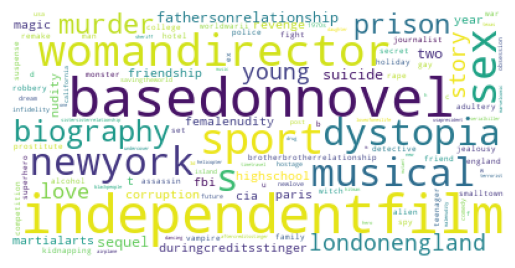

In [159]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [160]:
# stemming

In [161]:
ps = PorterStemmer()

In [162]:
def stem(text):
    l=[]
    for i in text.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [164]:
newdf['words'] = newdf['words'].apply(stem)
newdf['words']

C:\Users\sorig\AppData\Local\Temp\ipykernel_13460\855129414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['words'] = newdf['words'].apply(stem)


0       cultureclash futur spacewar spacecoloni societ...
1       ocean drugabu exoticisland eastindiatradingcom...
2       spi basedonnovel secretag sequel mi6 britishse...
3       dccomic crimefight terrorist secretid burglar ...
4       basedonnovel mar medallion spacetravel princes...
                              ...                        
4798    unitedstates–mexicobarri leg arm paperknif gui...
4799    a newlyw couple' honeymoon is upend by the arr...
4800    date loveatfirstsight narrat investig team pos...
4801    when ambiti new york attorney sam is sent to s...
4802    obsess camcord crush dreamgirl ever sinc the s...
Name: words, Length: 4770, dtype: object

In [ ]:
# vectorisation

In [165]:
cv =CountVectorizer(max_features=4000, stop_words='english')

In [166]:
vect = cv.fit_transform(newdf['words']).toarray()

In [167]:
vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
# using cosine similarity

In [172]:
similarity = cosine_similarity(vect)

In [173]:
newdf.shape

(4770, 8)

In [174]:
def recommend(movie):
    movie_index = newdf[newdf['title_x'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key = lambda x:x[1])[1:6]
    print('Maybe you will like these: \n')
    for i in movies_list:
        print(colored(newdf.iloc[i[0]].title_x.title(),'green', attrs=['bold']),", a movie released in ", newdf.iloc[i[0]].year, ",directed by", newdf.iloc[i[0]].director_rec, ". It has an average rating of", colored(newdf.iloc[i[0]].vote_average, 'blue',attrs=['bold']) )

In [ ]:
input_user = ''
while input_user!="Exit": 
            input_user = input("Please write the name of a movie:  ").lower().replace(", ", ",") 
            if input_user in newdf['title_x'].tolist():
                recommend(input_user)
            else:
                   input_user = input("Maybe something less obscure:  ").lower().replace(", ", ",") 
                   if input_user in newdf['title_x'].tolist():
                            recommend(input_user)
                   else: 
                            input_user = input("Last chance:  ").lower().replace(", ", ",")
                            if input_user in newdf['title_x'].tolist():
                                    recommend(input_user)
                            else:
                                break
                                print("i don't know that one")

Please write the name of a movie:  jaws 2
Maybe you will like these: 

Jaws , a movie released in  1975 ,directed by Steven Spielberg . It has an average rating of 7.5
Jaws: The Revenge , a movie released in  1987 ,directed by Joseph Sargent . It has an average rating of 3.5
The Reef , a movie released in  2010 ,directed by Andrew Traucki . It has an average rating of 5.4
The Shallows , a movie released in  2016 ,directed by Jaume Collet-Serra . It has an average rating of 6.2
Insidious: Chapter 3 , a movie released in  2015 ,directed by Leigh Whannell . It has an average rating of 6.2
